In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [2]:
GPPD_DF = pd.read_csv('Globalpowerplant.csv')

In [3]:
GPPD_DF.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
GPPD_DF.shape

(908, 25)

Feature column data type indicates that feature data are a mix of continuous and categorical data, while target/label('Primary Fuel') data type indicates that dependent variable data is categorical in nature and target/label 'capacity_mw' data type indicates that dependent variable data is continuous in nature.

In [5]:
GPPD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

From the above information it is evident that a lot of null values are present in many columns

In [6]:
GPPD_DF.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [7]:
# Checking null values

GPPD_DF.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Columns like other_fuel2,other_fuel3,wepp_id and estimated_generation_gwh have no data available so they will be dropped.

# Dataset Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database, The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

country_long (text): longer form of the country designation.

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013`(text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

We define the "Fuel Type" attribute of our database based on common fuel categories.

# Prediction:

Make two prediction  (1) Primary Fuel (2) capacity_mw

# Getting the basic summary and statistical information of data.

In [8]:
GPPD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [9]:
#Identifying the categorical(object) column

GPPD_DF.dtypes[GPPD_DF.dtypes=='object']

country                   object
country_long              object
name                      object
gppd_idnr                 object
primary_fuel              object
other_fuel1               object
other_fuel2               object
owner                     object
source                    object
url                       object
geolocation_source        object
generation_data_source    object
dtype: object

In [10]:
#Identifying the Continuous/Discrete Columns

GPPD_DF.dtypes[GPPD_DF.dtypes !='object']

capacity_mw                 float64
latitude                    float64
longitude                   float64
other_fuel3                 float64
commissioning_year          float64
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
estimated_generation_gwh    float64
dtype: object

In [11]:
GPPD_DF.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


From the above description it is observed that columns like capacity_mw, generation_gwh_2013, generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there are huge difference between 75% and max and their respective mean and 50% also are significantly different.

A higher std that mean in above columns indicates skeweness.

# Checking for null values in %

In [12]:
GPPD_DF.latitude.isnull().sum()/908*100

5.066079295154185

In [13]:
GPPD_DF.longitude.isnull().sum()/908*100

5.066079295154185

In [14]:
GPPD_DF.generation_data_source.isnull().sum()/908*100

50.440528634361236

In [15]:
GPPD_DF.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [16]:
GPPD_DF.other_fuel1.isnull().sum()/908*100

78.08370044052863

In [17]:
GPPD_DF.other_fuel2.isnull().sum()/908*100

99.8898678414097

In [18]:
GPPD_DF.other_fuel3.isnull().sum()/908*100

100.0

In [19]:
GPPD_DF.commissioning_year.isnull().sum()/908*100

41.85022026431718

In [20]:
GPPD_DF.owner.isnull().sum()/908*100

62.33480176211453

In [21]:
GPPD_DF.wepp_id.isnull().sum()/908*100

100.0

In [22]:
GPPD_DF.estimated_generation_gwh.isnull().sum()/908*100

100.0

In [23]:
GPPD_DF.year_of_capacity_data.isnull().sum()/908*100

42.731277533039645

In [24]:
GPPD_DF.generation_gwh_2013.isnull().sum()/908*100

57.70925110132159

In [25]:
GPPD_DF.generation_gwh_2014.isnull().sum()/908*100

55.837004405286336

In [26]:
GPPD_DF.generation_gwh_2015.isnull().sum()/908*100

53.19383259911894

In [27]:
GPPD_DF.generation_gwh_2016.isnull().sum()/908*100

51.87224669603524

In [28]:
GPPD_DF.generation_gwh_2017.isnull().sum()/908*100

51.2114537444934

Dropping columns estimated_generation_gwh,wepp_id,other_fuel3,other_fuel2,other_fuel1 since they contain insufficient amount of data.

In [29]:
GPPD_DF.drop(columns=['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],inplace = True)
GPPD_DF.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


Dropping columns Owner,URL,country,country_long,name,gppd_idnr since they do not contribute to building a good model for predicting the target variable values.

In [30]:
GPPD_DF.drop(columns = ['owner','country','country_long','name','gppd_idnr','url'],inplace= True)
GPPD_DF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Identifying the categorical columns

GPPD_DF.dtypes[GPPD_DF.dtypes=='object']

primary_fuel              object
source                    object
geolocation_source        object
generation_data_source    object
dtype: object

In [32]:
GPPD_DF.source.value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Moserbaer Solar                                1
Gmt Pvt ltd                                    1
Hothur Pvt ltd                                 1
Vikram Vikram cement                           1
Mahatma Power ltd                              1
Name: source, Length: 191, dtype: int64

In [33]:
GPPD_DF.generation_data_source.value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [34]:
GPPD_DF.geolocation_source.value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Dropping columns generation_data_source and source since they do not contribute to building a good model for predicting the target variable values.

In [35]:
GPPD_DF.drop(columns = ['generation_data_source','source'],inplace = True)

In [36]:
GPPD_DF

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,NaN,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN


# Checking for unique categories in the categorical columns with null values

In [37]:
#Indentifying the categorical columns

GPPD_DF.dtypes[GPPD_DF.dtypes == 'object'] 

primary_fuel          object
geolocation_source    object
dtype: object

In [38]:
GPPD_DF.geolocation_source.isnull().sum()

19

In [39]:
GPPD_DF.geolocation_source.unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

There are 3 unique categories in geolocation_source

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

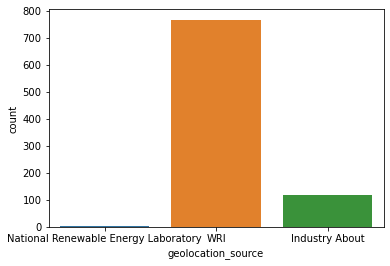

In [40]:
sns.countplot(GPPD_DF.geolocation_source)

In [41]:
# checking null value in %

GPPD_DF.geolocation_source.isnull().sum()/908*100

2.092511013215859

In [42]:
#checking most frequently occuring value

GPPD_DF.geolocation_source.mode()

0    WRI
dtype: object

In [43]:
# Checking the % share of most frequently occuring value.

(GPPD_DF['geolocation_source'] == 'WRI').sum()/GPPD_DF.geolocation_source.count()*100

86.16422947131609

# Imputing 'WRI' to NaN values in geolocation_source column

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose=0)

In [46]:
si = si.fit(GPPD_DF[['geolocation_source']])

In [47]:
GPPD_DF[['geolocation_source']] = si.transform(GPPD_DF[['geolocation_source']])

In [48]:
GPPD_DF[['geolocation_source']].isnull().sum()

geolocation_source    0
dtype: int64

There are no null values in 'geolocation_source' column

# Checking for Null values in continues/discrete columns

In [49]:
GPPD_DF.select_dtypes(exclude = object).isnull().sum()

capacity_mw                0
latitude                  46
longitude                 46
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

In [50]:
GPPD_DF.latitude

0      28.1839
1      24.7663
2      21.9038
3      23.8712
4      21.9603
        ...   
903    16.2949
904    12.8932
905    15.2758
906    24.3500
907     9.9344
Name: latitude, Length: 908, dtype: float64

In [51]:
GPPD_DF.longitude

0      73.2407
1      74.6090
2      69.3732
3      91.3602
4      82.4091
        ...   
903    77.3568
904    78.1654
905    75.5811
906    73.7477
907    77.4768
Name: longitude, Length: 908, dtype: float64

# Usining KNN Imputation technique for imputing  missing data

In [52]:
from sklearn.impute import KNNImputer

In [53]:
imp = KNNImputer(n_neighbors=2)

In [54]:
GPPD_DF[['latitude','longitude']] = imp.fit_transform(GPPD_DF[['latitude','longitude']])

In [55]:
GPPD_DF[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

There are no more values missing from Latitude and Longitude

In [56]:
# checking missing values in %
GPPD_DF.commissioning_year.isnull().sum()/908*100

41.85022026431718

In [57]:
GPPD_DF.commissioning_year.mode()

0    2013.0
dtype: float64

In [58]:
#checking the % share of mean year value.

(GPPD_DF['commissioning_year']==2013.0).sum()/GPPD_DF.commissioning_year.count()*100

5.303030303030303

In [59]:
GPPD_DF.commissioning_year.mean()

1996.876893939394

In [60]:
GPPD_DF.commissioning_year.median()

2000.0

In [61]:
#checking the % share of mean year value

(GPPD_DF['commissioning_year']==1996.0).sum()/GPPD_DF.commissioning_year.count()*100

2.462121212121212

In [62]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='median',verbose=0)
si = si.fit(GPPD_DF[['commissioning_year']])
GPPD_DF[['commissioning_year']] = si.transform(GPPD_DF[['commissioning_year']])
GPPD_DF[['commissioning_year']].isnull().sum()

commissioning_year    0
dtype: int64

In [63]:
# converting to int data type

GPPD_DF.commissioning_year = GPPD_DF.commissioning_year.astype('int64')

In [64]:
GPPD_DF.commissioning_year

0      2011
1      2000
2      2000
3      2004
4      2015
       ... 
903    2016
904    2000
905    2000
906    2000
907    2000
Name: commissioning_year, Length: 908, dtype: int64

In [65]:
GPPD_DF.year_of_capacity_data.value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

Dropping column year_of_capacity_data due to all values in it are '2018'

In [66]:
GPPD_DF.drop(columns = 'year_of_capacity_data',inplace = True)

In [67]:
GPPD_DF.shape

(908, 11)

# Checking outliers

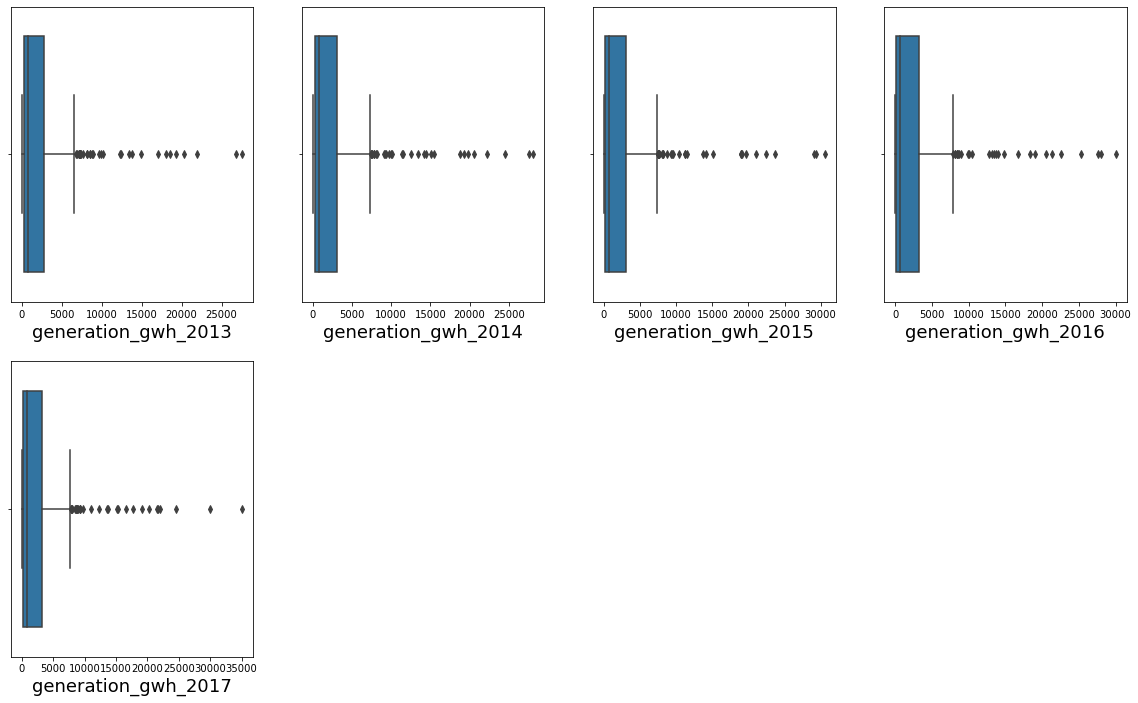

In [68]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnum = 1

x = GPPD_DF.drop(columns = ['capacity_mw','primary_fuel','geolocation_source','latitude','longitude','commissioning_year'])
for col in x:
    if plotnum<=13:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=18)
    plotnum+=1
plt.show()

As per above graph outliers exits, so imputing with KNN imputation technique.

In [69]:
si = SimpleImputer(missing_values = np.nan,strategy = 'median', verbose=0)
si = si.fit(GPPD_DF[['generation_gwh_2013']])
GPPD_DF[['generation_gwh_2013']] = si.transform(GPPD_DF[['generation_gwh_2013']])
GPPD_DF[['generation_gwh_2013']].isnull().sum()

generation_gwh_2013    0
dtype: int64

In [70]:
si = SimpleImputer(missing_values = np.nan,strategy = 'median', verbose=0)
si = si.fit(GPPD_DF[['generation_gwh_2014']])
GPPD_DF[['generation_gwh_2014']] = si.transform(GPPD_DF[['generation_gwh_2014']])
GPPD_DF[['generation_gwh_2014']].isnull().sum()

generation_gwh_2014    0
dtype: int64

In [71]:
si = SimpleImputer(missing_values = np.nan,strategy = 'median', verbose=0)
si = si.fit(GPPD_DF[['generation_gwh_2015']])
GPPD_DF[['generation_gwh_2015']] = si.transform(GPPD_DF[['generation_gwh_2015']])
GPPD_DF[['generation_gwh_2015']].isnull().sum()

generation_gwh_2015    0
dtype: int64

In [72]:
si = SimpleImputer(missing_values = np.nan,strategy = 'median', verbose=0)
si = si.fit(GPPD_DF[['generation_gwh_2016']])
GPPD_DF[['generation_gwh_2016']] = si.transform(GPPD_DF[['generation_gwh_2016']])
GPPD_DF[['generation_gwh_2016']].isnull().sum()

generation_gwh_2016    0
dtype: int64

In [73]:
si = SimpleImputer(missing_values = np.nan,strategy = 'median', verbose=0)
si = si.fit(GPPD_DF[['generation_gwh_2017']])
GPPD_DF[['generation_gwh_2017']] = si.transform(GPPD_DF[['generation_gwh_2017']])
GPPD_DF[['generation_gwh_2017']].isnull().sum()

generation_gwh_2017    0
dtype: int64

In [74]:
GPPD_DF.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

# There are no more null values

# Extracting the age of Power Plants from commissioning_year column, this will give us better picture with traget column data.

In [75]:
GPPD_DF['Age'] = GPPD_DF['commissioning_year'].apply(lambda y: 2021 - y)

In [76]:
GPPD_DF.drop(columns=['commissioning_year'],inplace= True)

In [77]:
GPPD_DF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,797.063475,805.760000,701.027250,716.728350,807.601700,10
1,98.0,24.7663,74.6090,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
2,39.2,21.9038,69.3732,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
3,135.0,23.8712,91.3602,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,17
4,1800.0,21.9603,82.4091,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,6
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,WRI,797.063475,805.760000,0.994875,233.596650,865.400000,5
904,3.0,12.8932,78.1654,Solar,Industry About,797.063475,805.760000,701.027250,716.728350,807.601700,21
905,25.5,15.2758,75.5811,Wind,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21
906,80.0,24.3500,73.7477,Coal,WRI,797.063475,805.760000,701.027250,716.728350,807.601700,21


# Interpreting relationship between independent and dependent variables

Analysing the continuous data type target column

In [78]:
GPPD_DF.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

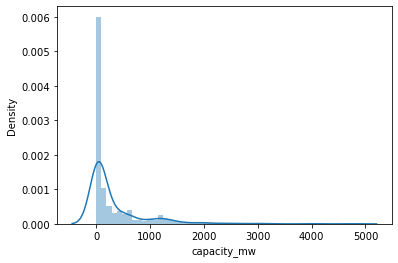

In [79]:
sns.distplot(GPPD_DF.capacity_mw)

In [80]:
GPPD_DF.select_dtypes(include=object).isnull().sum()

primary_fuel          0
geolocation_source    0
dtype: int64

In [81]:
GPPD_DF.capacity_mw.skew()

3.1932573023446458

Distribution of data is right skewed

# Analysing feature columns with continuous data

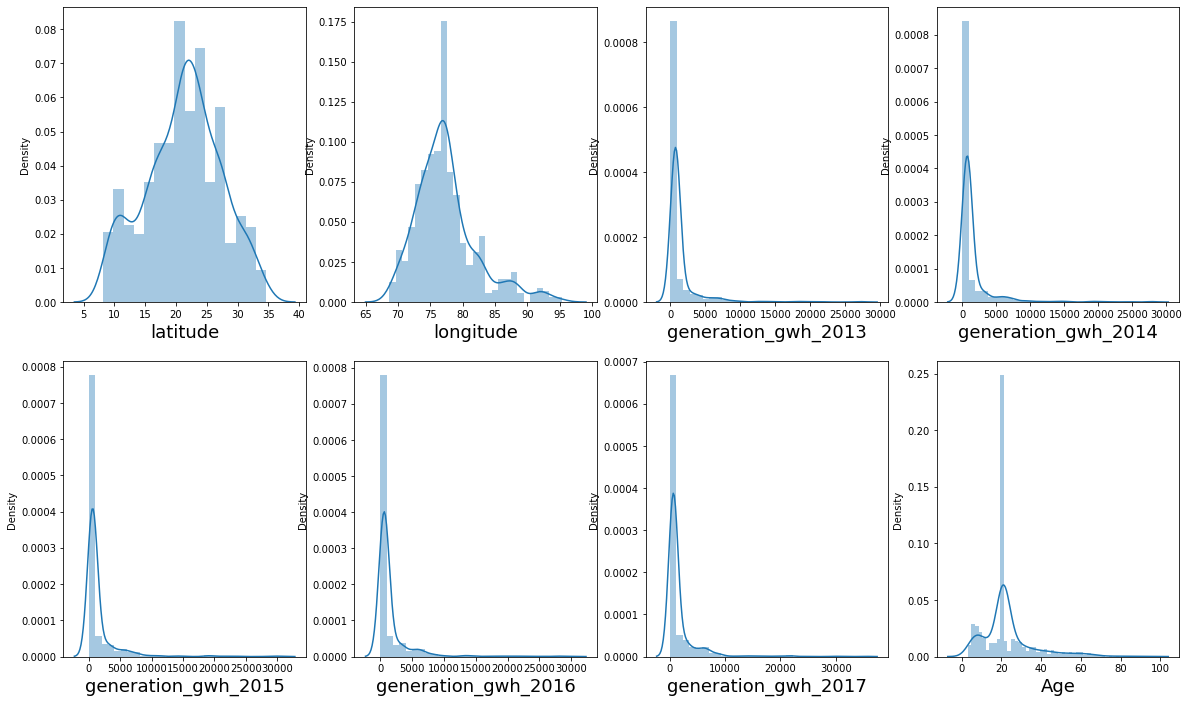

In [82]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

for col in GPPD_DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']):
    if plotnum<=12:
        plt.subplot(4,4,plotnum)
        sns.distplot(GPPD_DF[col])
        plt.xlabel(col,fontsize=18)
    plotnum+=1
plt.show()

Data ditribution are skewed.

# capacity_mw vs continuous/discrete data type column

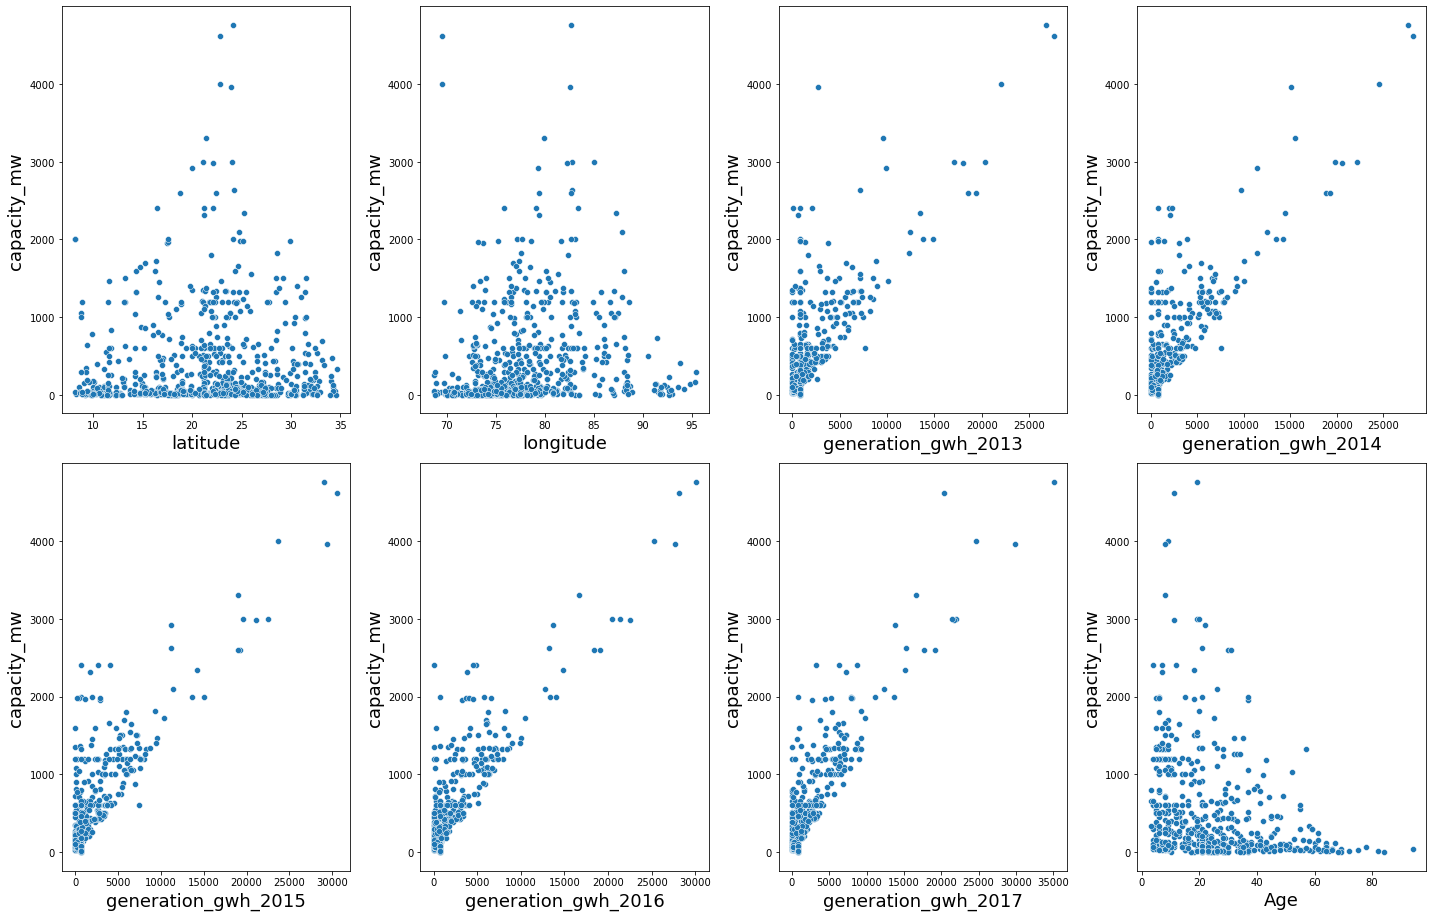

In [83]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

y = GPPD_DF['capacity_mw']
x = GPPD_DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])

for col in x:
    if plotnum<=13:
        plt.subplot(4,4,plotnum)
        sns.scatterplot(x[col],y)
        plt.xlabel(col,fontsize=18)
        plt.ylabel('capacity_mw',fontsize=18)
    plotnum+=1
plt.tight_layout()

        

As per above graph it can observ a linear relationship between columns 'generation_gwh_2013', 'generation_geh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'.

<Figure size 432x432 with 0 Axes>

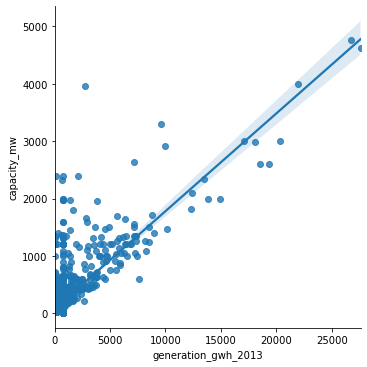

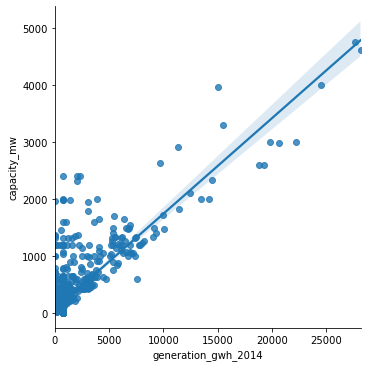

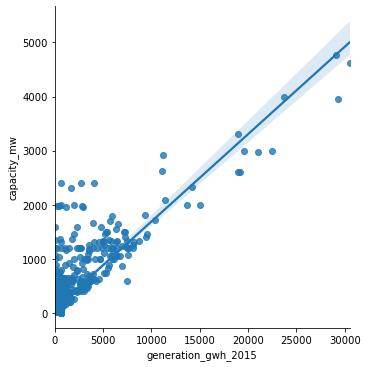

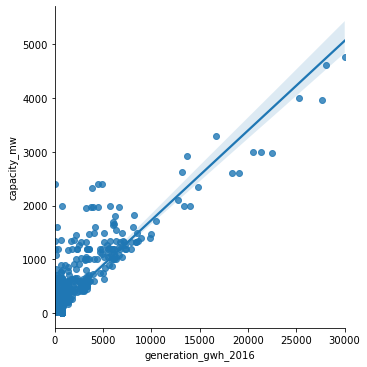

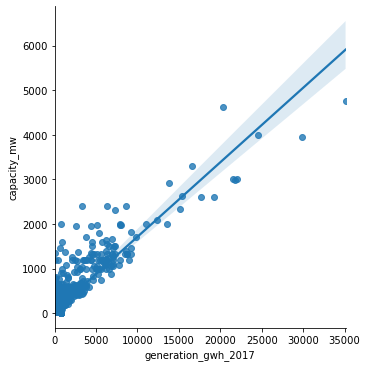

In [84]:
plt.figure(figsize=(6,6),facecolor='white')
x = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']
for col in x:
    sns.lmplot(x = col, y = 'capacity_mw',data = GPPD_DF)

# capacity_mw vs categorical data type column

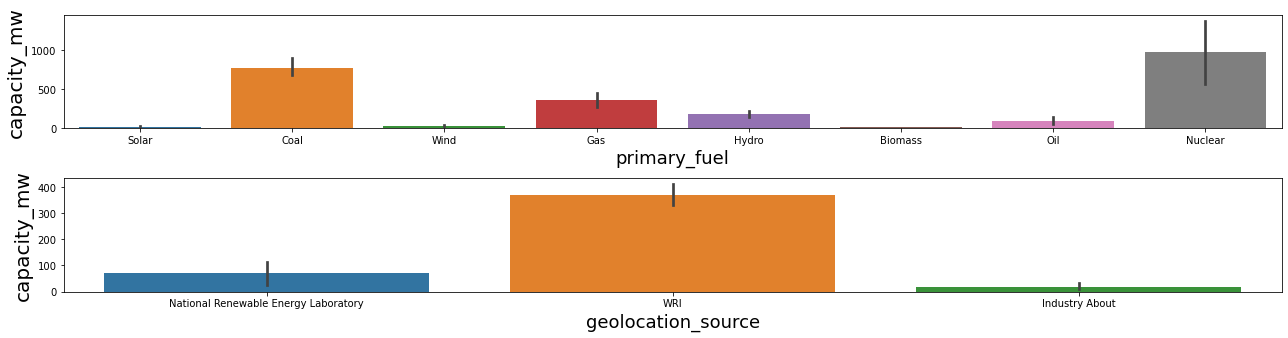

In [85]:
plt.figure(figsize=(18,20),facecolor='white')
plotnum = 1

y = GPPD_DF['capacity_mw']
x = GPPD_DF[['primary_fuel','geolocation_source']]

for col in x:
    if plotnum<=13:
        plt.subplot(9,1,plotnum)
        sns.barplot(x[col],y)
        plt.xlabel(col,fontsize=18)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

As per the above graphs it is observed that Nuclear fuel type power plants have the highest capacity followed by coal type.

Most of the data for gelocation source is provided by WRI.

# Analysing the categorical data type Target column

In [86]:
GPPD_DF.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

There are 8 unique categories in primary_fuel

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

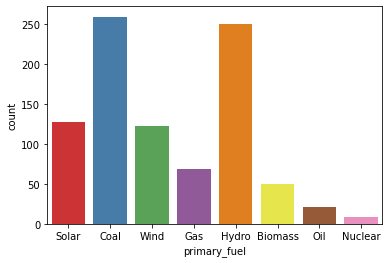

In [87]:
sns.countplot(GPPD_DF['primary_fuel'],palette = "Set1")

In [88]:
GPPD_DF.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

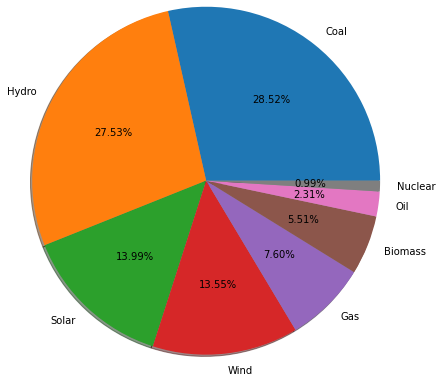

In [89]:
labels = 'Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig,ax = plt.subplots()
ax.pie(GPPD_DF['primary_fuel'].value_counts(),labels=labels,radius=2,autopct = '%1.2f%%',shadow=True,)
plt.show()

Class :

Coal: has 28.52% of total values

Hydro:has 27.53% of total values

Solar:has 13.99% of total values

Wind:has 13.55% of total values

Gas: has 7.60% of total values

Biomass: has 5.51% of total values

Oil:has 2.31% of total values

Nuclear: has 0.99% of total values

Classes are imbalances

# Interpreting relationship between dependent variable and independent variable

'primary_fuel' vs Continuous/Discrete data columns

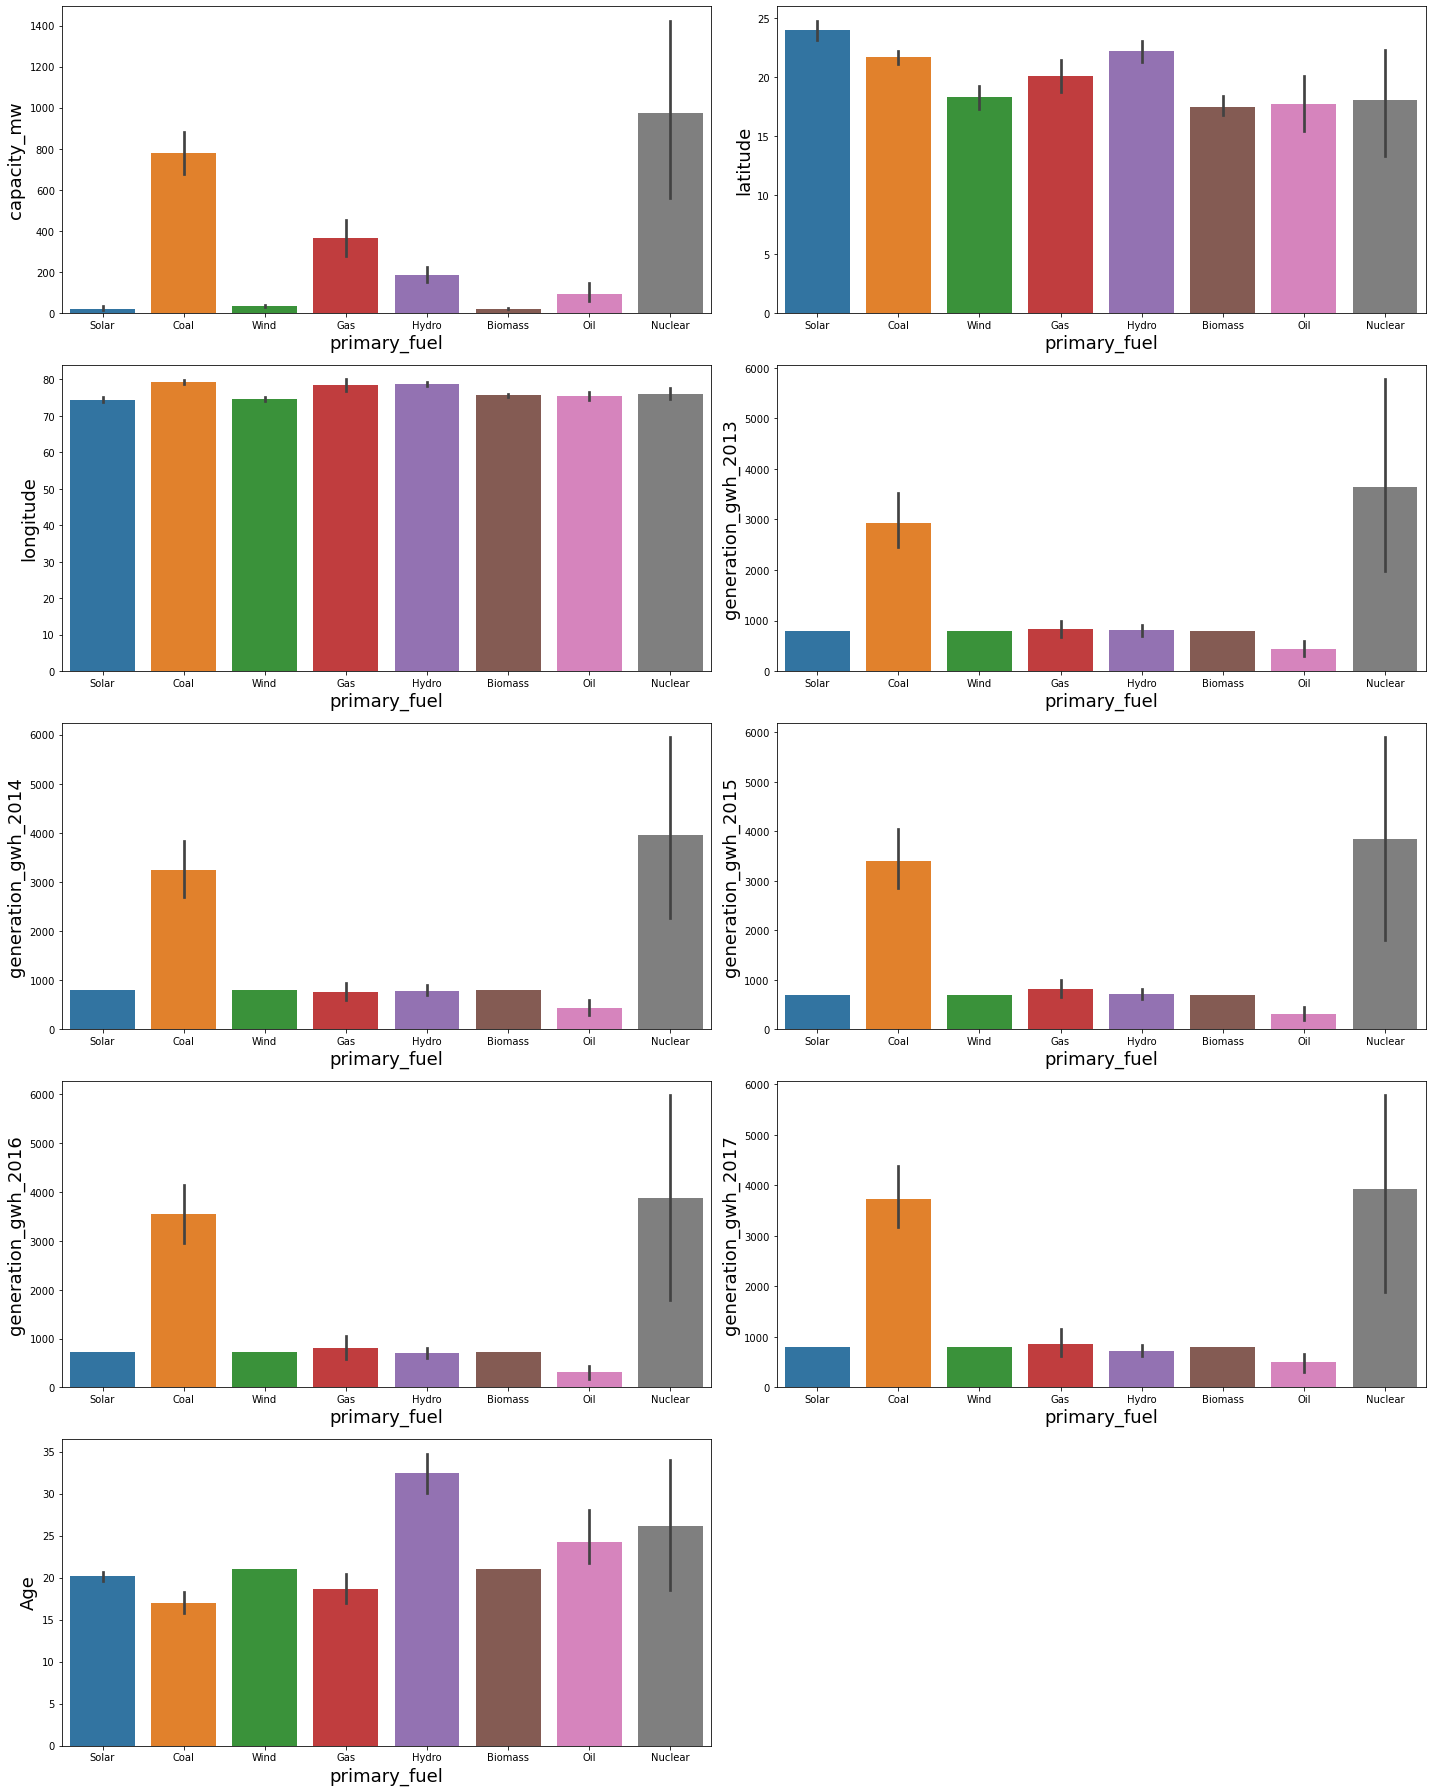

In [90]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1

y = GPPD_DF['primary_fuel']
x = GPPD_DF.drop(columns=['primary_fuel','geolocation_source'])

for col in x:
    if plotnum<=13:
        plt.subplot(5,2,plotnum)
        sns.barplot(y,x[col])
        plt.xlabel('primary_fuel',fontsize=18)
        plt.ylabel(col,fontsize=18)
    plotnum+=1
plt.tight_layout()

Following observation can made as per the above graphs:

Highest power generation capacity belongs to Nuclear plants followed by Coal and the by Gas.

Hydro Power Plants have been running for the longest period

While Power generation is the highest for Nuclear plants, Power generation has been on the rise for Coal power plants.

# 'primary_fuel' vs Categorical data columns

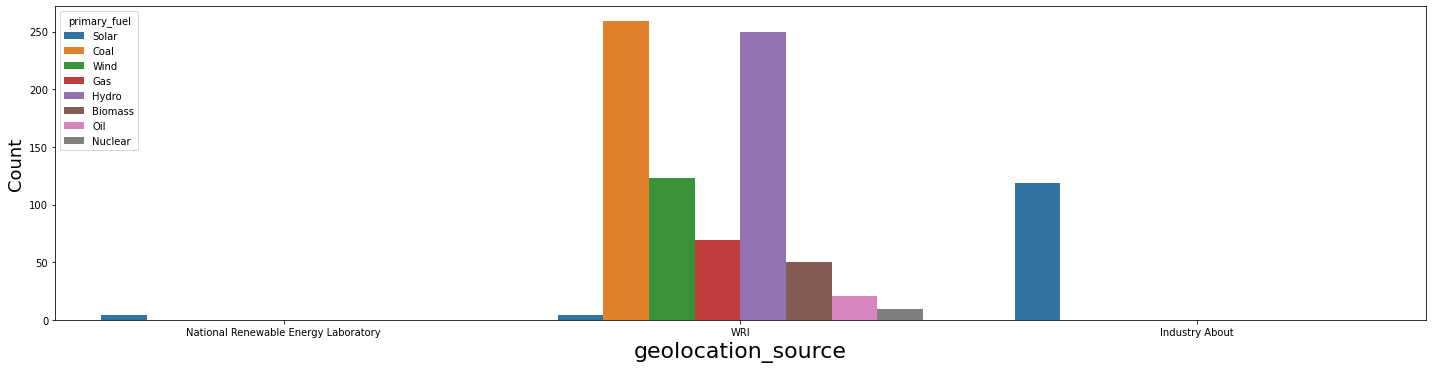

In [91]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1

y = GPPD_DF['primary_fuel']
x = GPPD_DF[['geolocation_source']]

for col in x:
    if plotnum<=13:
        plt.subplot(5,1,plotnum)
        sns.countplot(x[col],hue=y)
        plt.xlabel(col,fontsize=22)
        plt.ylabel('Count',fontsize=18)
    plotnum+=1
plt.tight_layout()

Most of the Geolocation source data provided by WRI

# Checking for outliers columns with continuous distributions

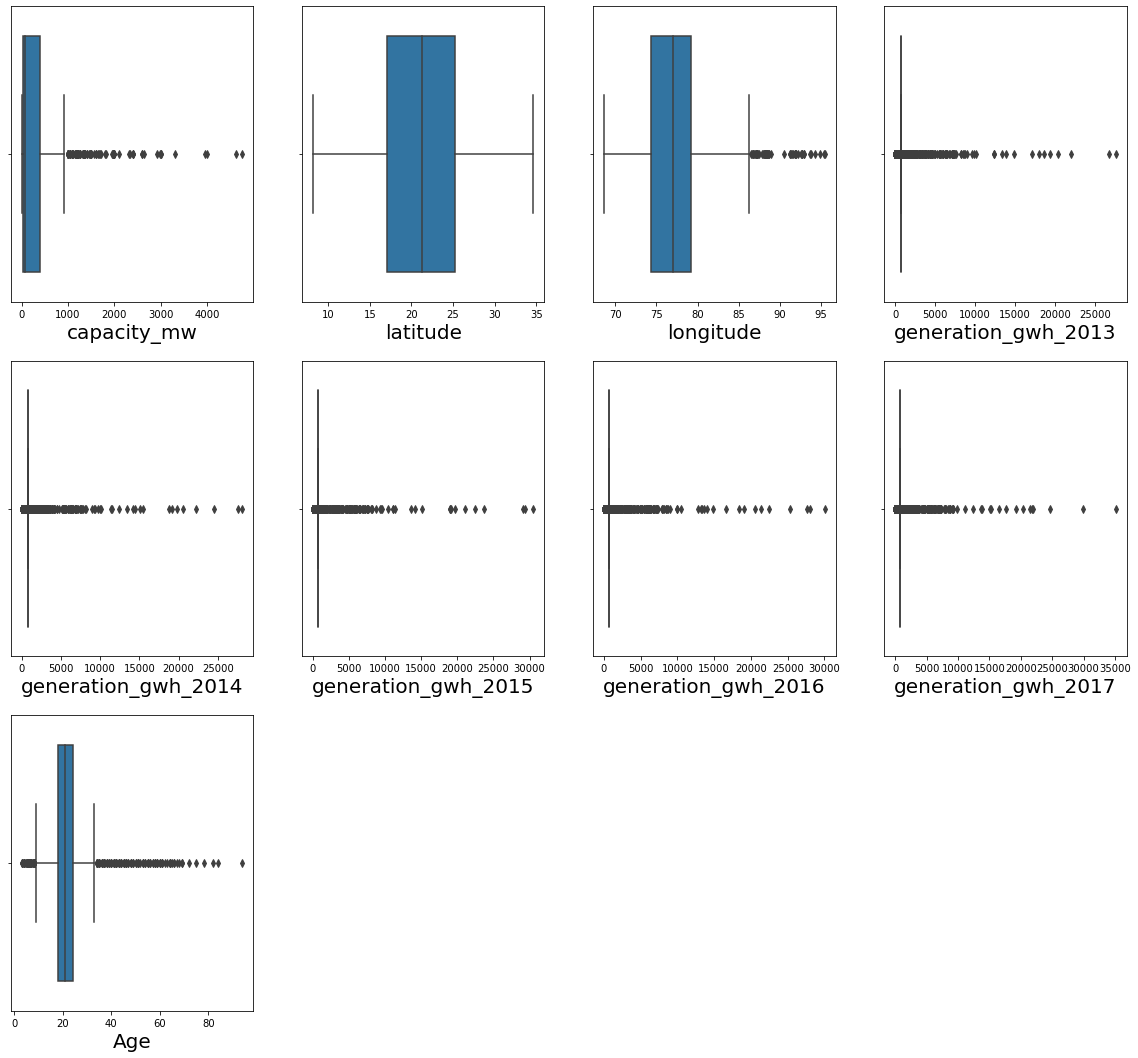

In [92]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

x = GPPD_DF.drop(columns = ['primary_fuel','geolocation_source'])

for col in x:
    if plotnum<=13:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

All columns have outliers except latitude column.

In [93]:
df2 = GPPD_DF.drop(columns = ['capacity_mw','primary_fuel','geolocation_source']).copy()

# Using Zscore method

In [94]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)]

In [95]:
df3.shape

(852, 8)

In [96]:
df2.shape

(908, 8)

# Checking data loss %

In [97]:
loss = (908-852)/908*100

In [98]:
loss

6.167400881057269

6.16% of data loss in acceptable range

# Using IQR method

In [99]:
df = GPPD_DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).copy()

In [100]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile (0.25)
    q3 = df[colm].quantile (0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop,indx)
    
# find all the indices of outliers in the column using IQR method and append them to indxdrop array

In [101]:
df = df.drop(indxdrop)

In [102]:
df.shape

(422, 8)

In [103]:
# checking Data loss %

loss = (908-422)/908*100
loss

53.524229074889874

53.52% of data loss not acceptable

# Using Z score method to reduce outliers

In [104]:
dropindx= GPPD_DF.index.difference(df3.index)

In [105]:
# dropping the outliers from original features dataframe

GPPD_DF.drop(dropindx,inplace = True)

In [106]:
GPPD_DF.shape

(852, 11)

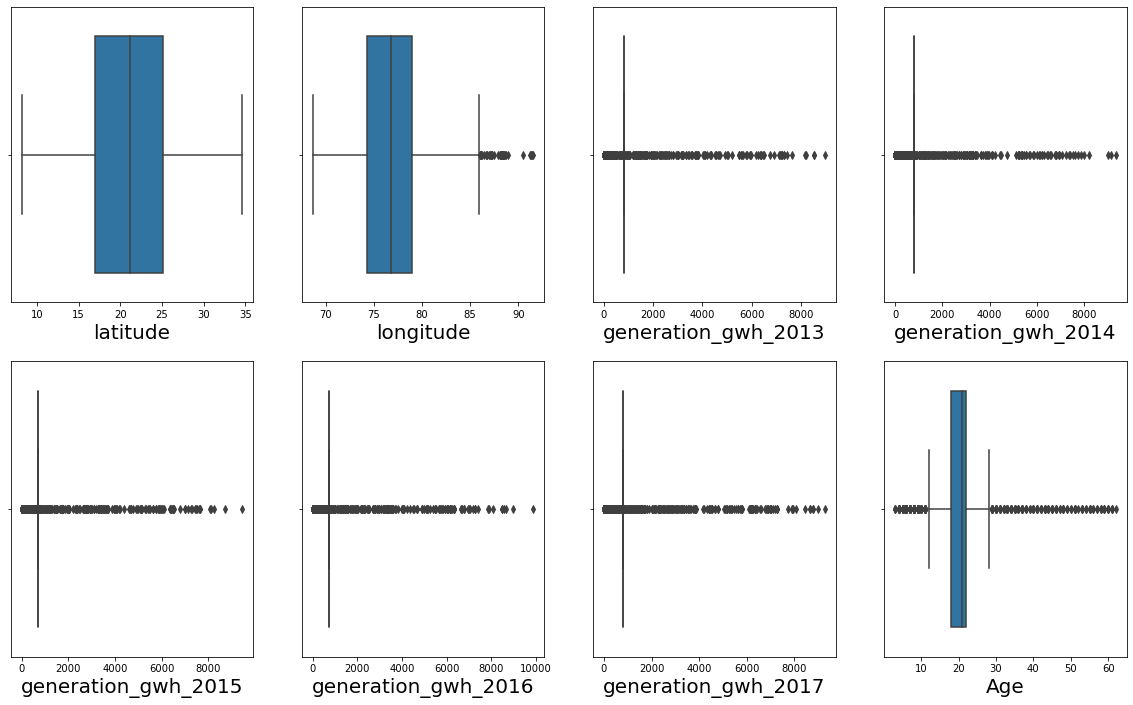

In [107]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum = 1

x = GPPD_DF.drop(columns = ['capacity_mw','primary_fuel','geolocation_source'])
for col in x:
    if plotnum<=14:
        plt.subplot(4,4,plotnum)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some outliers have been removed

# Checking for skewness in data.

In [108]:
GPPD_DF.drop(columns=['capacity_mw','primary_fuel','geolocation_source']).skew()

latitude              -0.108867
longitude              0.861390
generation_gwh_2013    3.096648
generation_gwh_2014    2.940976
generation_gwh_2015    2.714988
generation_gwh_2016    2.635667
generation_gwh_2017    2.532066
Age                    1.209638
dtype: float64

Skewness available in all columns except Latitude.

# Reducing skewness using PowerTransformer

In [109]:
from sklearn.preprocessing import PowerTransformer

In [110]:
powtrns = PowerTransformer(method = 'yeo-johnson',standardize = True)

In [111]:
df4 = GPPD_DF.drop(columns = ['capacity_mw','primary_fuel','geolocation_source']).copy()

In [112]:
transformed = powtrns.fit_transform(df4)

In [113]:
transformed = pd.DataFrame(transformed, columns = df.columns) #to convert numpy array back to dataframe

In [114]:
transformed.skew()

latitude              -0.068918
longitude              0.000185
generation_gwh_2013    0.278188
generation_gwh_2014    0.233082
generation_gwh_2015    0.162566
generation_gwh_2016    0.146869
generation_gwh_2017    0.125693
Age                    0.026590
dtype: float64

Skewness has been removed.

In [115]:
transformed.index = GPPD_DF.index

In [116]:
GPPD_DF[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]=transformed[['latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Age']]

In [117]:
GPPD_DF

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age
0,2.5,1.163901,-0.932007,Solar,National Renewable Energy Laboratory,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220
1,98.0,0.594361,-0.512059,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
2,39.2,0.120945,-2.360637,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
3,135.0,0.445952,2.506368,Gas,WRI,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572
4,1800.0,0.130255,1.276071,Coal,WRI,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528
...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,Coal,WRI,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887
904,3.0,-1.342530,0.415127,Solar,Industry About,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
905,25.5,-0.960142,-0.236518,Wind,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760
906,80.0,0.525297,-0.771804,Coal,WRI,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760


In [118]:
GPPD_DF2 = GPPD_DF.copy()

# Encoding the categorical columns.

Encoding using get_dummies()

In [119]:
dumm = pd.get_dummies(GPPD_DF[['geolocation_source','primary_fuel']],drop_first = False)

In [120]:
GPPD_DF2 = GPPD_DF.join(dumm)

In [121]:
GPPD_DF2.drop(columns = ['geolocation_source','primary_fuel'],axis=1,inplace = True)

In [122]:
GPPD_DF2

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,1.163901,-0.932007,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0,0,0,0,0,0,0,1,0
1,98.0,0.594361,-0.512059,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0
2,39.2,0.120945,-2.360637,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
3,135.0,0.445952,2.506368,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1,0,0,1,0,0,0,0,0
4,1800.0,0.130255,1.276071,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1,0,1,0,0,0,0,0,0
904,3.0,-1.342530,0.415127,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0,0,0,0,0,0,0,1,0
905,25.5,-0.960142,-0.236518,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,0,0,0,0,0,0,1
906,80.0,0.525297,-0.771804,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1,0,1,0,0,0,0,0,0


# Finding Correlation

In [123]:
p_corr = GPPD_DF2.corr()
p_corr

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Biomass,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
capacity_mw,1.000000,0.047646,0.264871,0.437067,0.472641,0.529770,0.592951,0.609628,-0.330289,-0.233928,-0.032214,0.236977,-0.145095,0.482836,0.066212,-0.097285,0.164332,-0.065582,-0.240402,-0.226219
latitude,0.047646,1.000000,-0.075132,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341,-0.150842,0.055736,-0.068640,0.098074,-0.050774,-0.089913,0.203657,-0.191644
longitude,0.264871,-0.075132,1.000000,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015,-0.057630,0.336133,0.010613,0.142559,-0.014173,-0.051091,-0.297718,-0.249304
generation_gwh_2013,0.437067,0.071133,0.043394,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132,-0.011075,0.307972,-0.123188,-0.180546,0.143608,-0.168762,-0.018478,-0.018219
generation_gwh_2014,0.472641,0.107972,0.038069,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782,-0.011471,0.329678,-0.164219,-0.180512,0.157731,-0.167294,-0.019140,-0.018871
generation_gwh_2015,0.529770,0.105058,0.038066,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624,-0.013207,0.338291,-0.098746,-0.201144,0.116281,-0.203248,-0.022036,-0.021728
generation_gwh_2016,0.592951,0.123892,0.097417,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325,-0.013636,0.390060,-0.143816,-0.211305,0.082568,-0.221567,-0.022751,-0.022432
generation_gwh_2017,0.609628,0.103338,0.085258,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040,-0.009797,0.384980,-0.156796,-0.234475,0.079906,-0.152442,-0.016346,-0.016117
Age,-0.330289,-0.095778,-0.161891,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167,0.020415,-0.334356,-0.083025,0.336870,0.039038,0.051068,-0.008627,0.033584
geolocation_source_Industry About,-0.233928,0.194798,-0.292285,-0.017784,-0.018421,-0.021209,-0.021896,-0.015732,0.032782,1.000000,-0.027538,-0.980787,-0.100113,-0.251086,-0.115229,-0.235113,-0.041429,-0.063739,0.962445,-0.164696


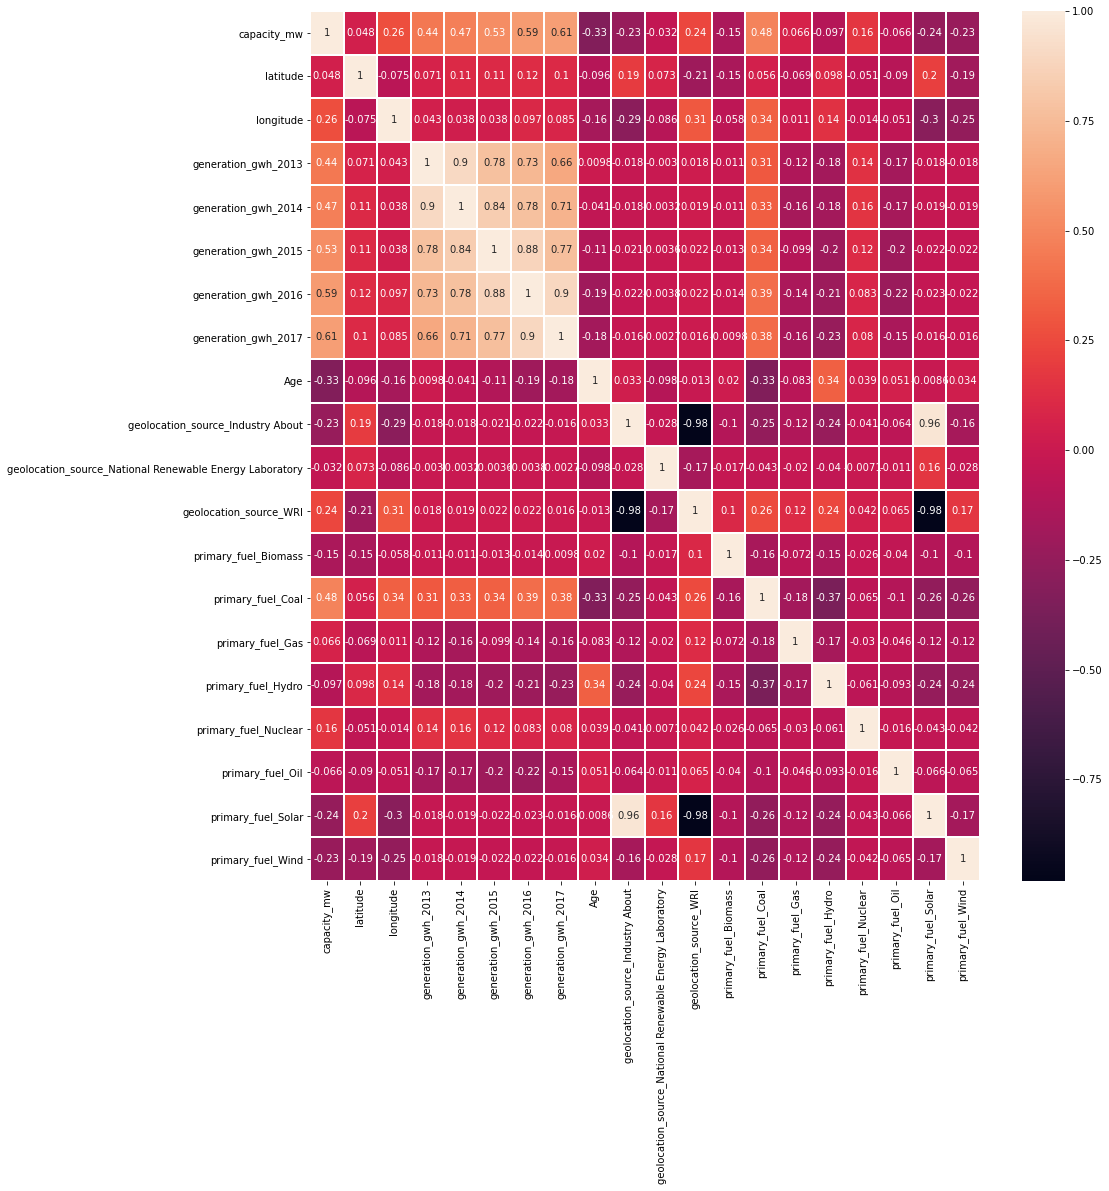

In [124]:
plt.figure(figsize=(15,16))
sns.heatmap(p_corr,annot=True,linewidth=1)
plt.show()

# Visualising correlation of feature columns with label columns

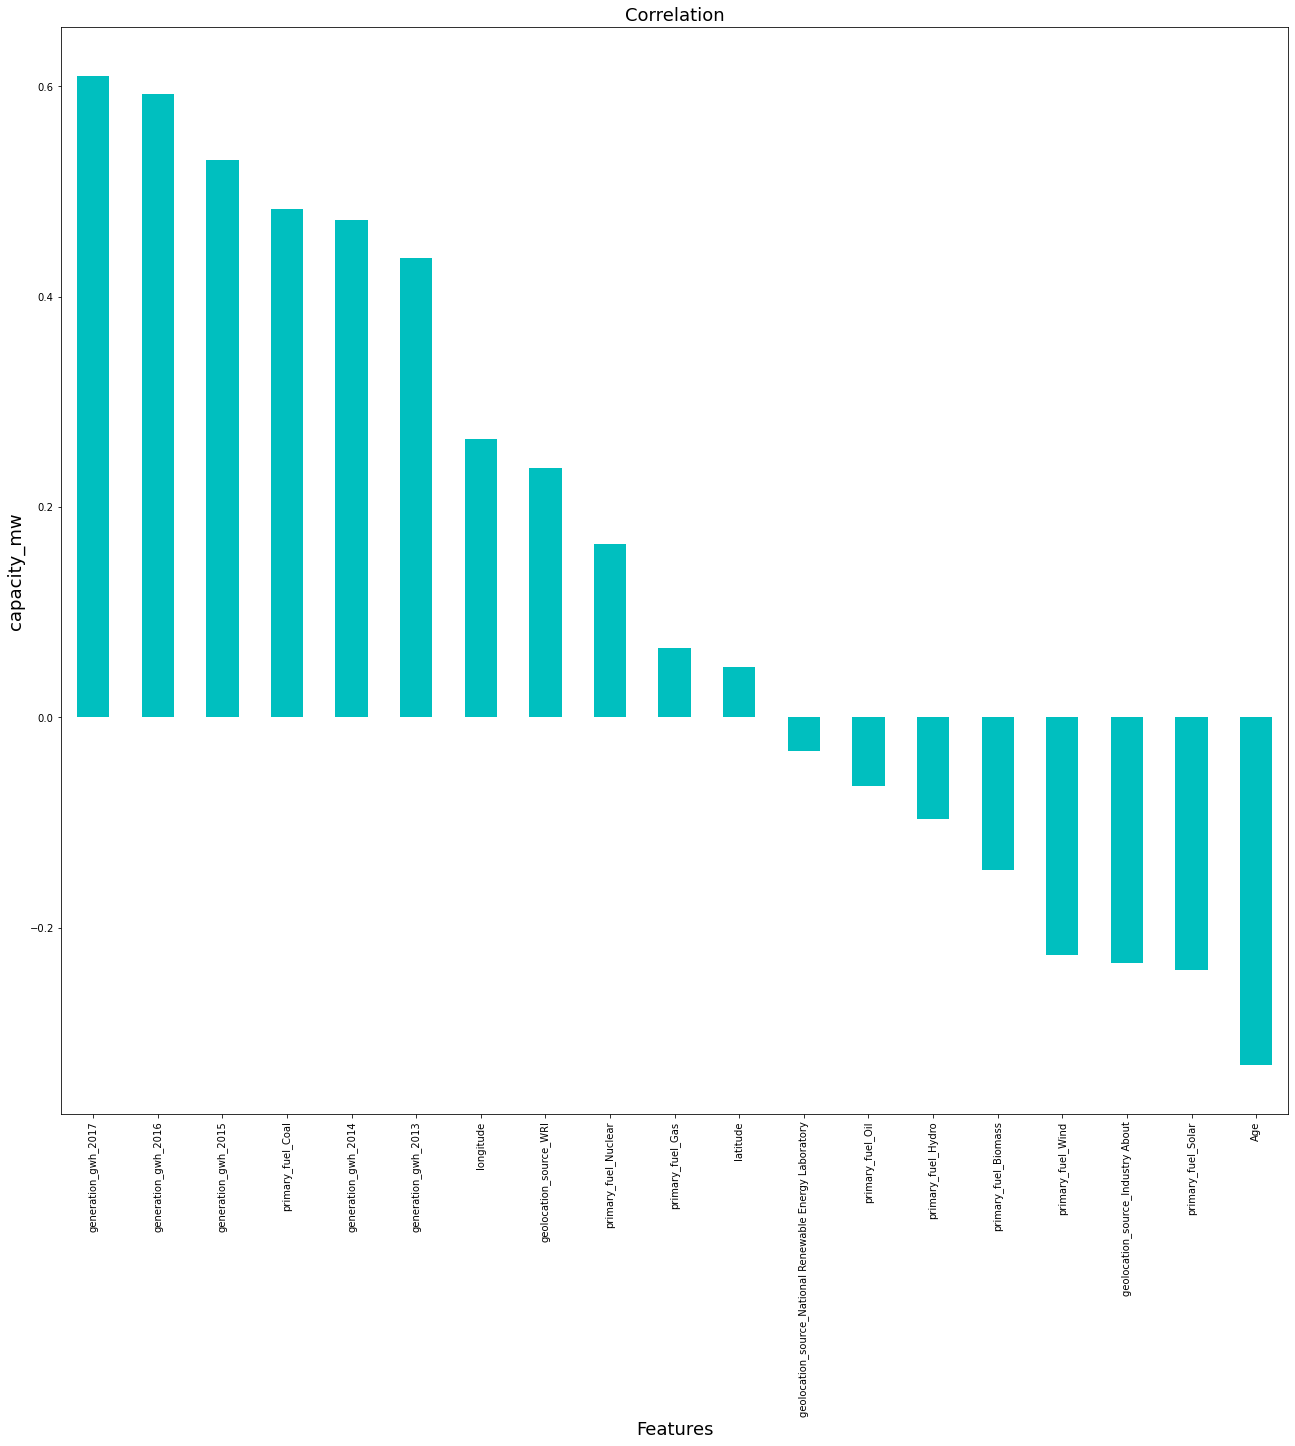

In [125]:
plt.figure(figsize=(22,20))
GPPD_DF2.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=18)
plt.ylabel('capacity_mw',fontsize=18)
plt.title('Correlation',fontsize=18)
plt.show()

primary_fuel_coal,generation_gwh_2017,generation_gwh_2016,Longitude,generation_gwh_2015,geolocation_source_WRI have the highest positive correlation, while Age,Primary_fuel_Solar,geolocation_source_industry about,Primary_fuel_Wind have the highest negative correlation with capacity_mw.

# Feature Selection

In [126]:
from sklearn.preprocessing import StandardScaler

In [128]:
x = GPPD_DF2.drop(columns = ['capacity_mw'])
y = GPPD_DF2['capacity_mw']

In [129]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Checking multicollinearity using variance inflation factor

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
vif = pd.DataFrame()

In [133]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [135]:
vif.head(10)

,Features,vif
0,latitude,1.186063
1,longitude,1.370978
2,generation_gwh_2013,5.544800
3,generation_gwh_2014,7.417128
4,generation_gwh_2015,6.257602
5,generation_gwh_2016,9.921788
6,generation_gwh_2017,5.333128
7,Age,1.391057
8,geolocation_source_Industry About,inf
9,geolocation_source_National Renewable Energy L...,inf


multicollinearity exists amongst generation_gwh_2014,generation_gwh_2015,generation_gwh_2016

# Principle Component Analysis

In [136]:
from sklearn.decomposition import PCA

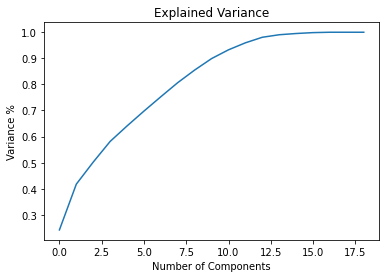

In [138]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()       

15 components explain around 95% variance in data

# Selecting KBest feature

In [139]:
from sklearn.feature_selection import SelectKBest, f_classif

In [140]:
bestfeat = SelectKBest(score_func = f_classif,k=19)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [143]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(19,'Score'))

                                              Feature     Score
13                                   primary_fuel_Gas  5.618786
6                                 generation_gwh_2017  4.680588
5                                 generation_gwh_2016  4.210302
3                                 generation_gwh_2014  3.364710
18                                  primary_fuel_Wind  3.352449
8                   geolocation_source_Industry About  3.351059
10                             geolocation_source_WRI  3.231852
17                                 primary_fuel_Solar  3.163634
4                                 generation_gwh_2015  3.140176
12                                  primary_fuel_Coal  3.074000
2                                 generation_gwh_2013  3.049878
15                               primary_fuel_Nuclear  2.616195
16                                   primary_fuel_Oil  2.366212
7                                                 Age  2.280104
14                                 prima

Dropping highly multicollinear column : 'generation_gwh_2016'.

In [144]:
x_best = x.drop(columns=['generation_gwh_2016']).copy()

In [145]:
scaled_x_best = scaler.fit_transform(x_best)

Target/Label column ('capacity_mw') has continuous type of data.

Regression model building.

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
from sklearn.metrics import r2_score

# Finding the best random state

In [150]:
from sklearn.ensemble import RandomForestRegressor

maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31,random_state = i)
    modRF = RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print(f"Best Accuracy is : {maxAcc} on Random State: {maxRS}")

Best Accuracy is : 0.8446848798918841 on Random State: 7


In [151]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size=.31,random_state = 7)

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [153]:
from sklearn.metrics import r2_score,mean_squared_error

In [154]:
r = Ridge()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xg = XGBRegressor()
SV = SVR()

# Training the model

In [155]:
r.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)

SVR()

All models have been trained

# Ridge regression model

In [156]:
y_r_pred = r.predict(x_test)

In [157]:
# R2 Score

r2_score(y_test,y_r_pred)

0.6230497783850041

In [158]:
# Mean Squared Error

mean_squared_error(y_test,y_r_pred)

63210.37909174171

In [159]:
# Root mean squared error

np.sqrt(mean_squared_error(y_test,y_r_pred))

251.41674385716976

# Decision Tree Regressor Model

In [160]:
y_dt_pred = dt.predict(x_test)

In [161]:
# R2 score

r2_score(y_test,y_dt_pred)

0.6398396327504925

In [162]:
# Mean Squared Error

mean_squared_error(y_test,y_dt_pred)

60394.90638876604

In [163]:
# Root Mean Squared Error

np.sqrt(mean_squared_error(y_test,y_dt_pred))

245.75375152531453

# Random Forest Regressor Model

In [164]:
y_rf_pred = rf.predict(x_test)

In [165]:
# R2 Score

r2_score(y_test,y_rf_pred)

0.8550180778021359

In [166]:
# Mean Squared Error

mean_squared_error(y_test,y_rf_pred)

24311.863312648646

In [167]:
# Root Mean Squared Error

np.sqrt(mean_squared_error(y_test,y_rf_pred))

155.92261963117681

# XGB Regressor Model

In [168]:
y_xg_pred = xg.predict(x_test)

In [169]:
# R2 Score

r2_score(y_test,y_xg_pred)

0.8146951036087696

In [170]:
# Mean Squared Error

mean_squared_error(y_test,y_xg_pred)

31073.579684505527

In [171]:
# Root mean squared error

np.sqrt(mean_squared_error(y_test,y_xg_pred))

176.27699703734893

# Support Vector Regressor Model

In [172]:
y_sv_pred = SV.predict(x_test)

In [173]:
# R2 Score

r2_score(y_test,y_sv_pred)

-0.15821627907857727

In [174]:
# Mean Squared Error

mean_squared_error(y_test,y_sv_pred)

194220.0478278506

In [175]:
# Root Mean Squared Error

np.sqrt(mean_squared_error(y_test,y_sv_pred))

440.7040365459007

# Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

# Hyper Parameter Tuning

Random Forest Regressor

In [176]:
parameter = {'n_estimators': [30,60,80,100],'max_depth':[10,20,40,60],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10,20],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [177]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs= -1,verbose=1)

In [178]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [10, 20, 40, 60],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [30, 60, 80, 100]},
             verbose=1)

In [179]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 30}

In [182]:
Best_mod1 = RandomForestRegressor(n_estimators = 30,max_depth = 40,min_samples_leaf = 5,min_samples_split = 5,criterion = 'mse',max_features = 'log2')

In [183]:
Best_mod1.fit(x_train,y_train)

RandomForestRegressor(max_depth=40, max_features='log2', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=30)

In [184]:
rfpred = Best_mod1.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

85.45890112625457


# RandomForest Regressor has accuracy of 85.45%

Saving the Model

In [185]:
import joblib 
joblib.dump(Best_mod1,"BestModelpowercapccity.pkl")

['BestModelpowercapccity.pkl']

# Loading the model

In [186]:
mod = joblib.load("BestModelpowercapccity.pkl")

In [187]:
print(mod.predict(x_test))

[  34.33765592   92.02614899   36.10183489  448.4484722   396.06155204
  131.30652256   18.06593988 1126.46563536   28.90521973 1113.40288179
  956.51256461  251.1113993    35.14840184   80.1944528  1121.61427918
   96.06150705   54.93676762   26.4145349   432.6227371  1110.96361335
  458.45518024   39.45225247   13.7874002   129.8144553    35.65895857
  305.0627129    28.22902846  128.53520629   26.30397072 1148.58978887
  422.60153795   17.58862423   25.46586603  115.74354371  252.71775267
  890.07645683   42.77411072   66.28307157   83.09576277  103.19736665
   34.04852307   73.15543428   97.8837115  1117.86618617  127.3077774
   86.11397219  166.0202213    88.80755706  112.56144577  536.56162454
  163.67031036 1428.99453112  148.99240788  115.04473074   96.06150705
  203.88752263  588.40697021   43.9352258   704.52472738   92.02614899
  305.21051113  471.51207274   34.4661702    32.69821953   61.21925445
   42.90672899   29.10218236  181.63052874  608.04314934  394.05099471
  451.0

In [188]:
prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
prediction_accuracy.head(20)

,Predictions,Actual Values
362,34.337656,26.000
451,92.026149,15.000
338,36.101835,18.000
211,448.448472,431.586
869,396.061552,186.200
292,131.306523,54.500
403,18.065940,20.000
598,1126.465635,1980.000
339,28.905220,16.000
148,1113.402882,1660.000


# Target/Label column ('primary_fuel') has Categorical type of Data.

# Classification Model Building

# Encoding the categorical feature column

# Encoding using get_dummies()

In [189]:
dumm = pd.get_dummies(GPPD_DF[['geolocation_source']],drop_first = False)

In [190]:
GPPD_DF = GPPD_DF.join(dumm)

In [191]:
GPPD_DF.drop(columns = ['geolocation_source'],axis=1,inplace=True)

# Encoding the label column

Encoding the categorical data using Label Encoding Technique

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
labenc = LabelEncoder()

In [194]:
GPPD_DF['primary_fuel'] = labenc.fit_transform(GPPD_DF['primary_fuel'])

In [195]:
GPPD_DF

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,1.163901,-0.932007,6,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,-1.160220,0,1,0
1,98.0,0.594361,-0.512059,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
2,39.2,0.120945,-2.360637,7,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
3,135.0,0.445952,2.506368,2,-0.259129,-0.276296,0.101229,0.118902,-0.192428,-0.311572,0,0,1
4,1800.0,0.130255,1.276071,1,0.743909,1.423753,2.285309,2.271019,1.972415,-1.812528,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,-0.795476,0.222976,1,-0.044354,-0.045943,-2.448545,-0.825789,0.016799,-2.010887,0,0,1
904,3.0,-1.342530,0.415127,6,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,1,0,0
905,25.5,-0.960142,-0.236518,7,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1
906,80.0,0.525297,-0.771804,1,-0.044354,-0.045943,-0.052896,-0.054610,-0.039236,0.081760,0,0,1


# Finding Correlation

In [196]:
P_corr = GPPD_DF.corr()
P_corr

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Age,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
capacity_mw,1.000000,0.047646,0.264871,-0.398618,0.437067,0.472641,0.529770,0.592951,0.609628,-0.330289,-0.233928,-0.032214,0.236977
latitude,0.047646,1.000000,-0.075132,-0.004801,0.071133,0.107972,0.105058,0.123892,0.103338,-0.095778,0.194798,0.072961,-0.206341
longitude,0.264871,-0.075132,1.000000,-0.408154,0.043394,0.038069,0.038066,0.097417,0.085258,-0.161891,-0.292285,-0.085956,0.305015
primary_fuel,-0.398618,-0.004801,-0.408154,1.000000,-0.137352,-0.140825,-0.160769,-0.180194,-0.162065,0.157473,0.471385,0.080745,-0.480620
generation_gwh_2013,0.437067,0.071133,0.043394,-0.137352,1.000000,0.900625,0.775650,0.729449,0.658863,0.009817,-0.017784,-0.003046,0.018132
generation_gwh_2014,0.472641,0.107972,0.038069,-0.140825,0.900625,1.000000,0.837628,0.780962,0.709653,-0.040598,-0.018421,-0.003155,0.018782
generation_gwh_2015,0.529770,0.105058,0.038066,-0.160769,0.775650,0.837628,1.000000,0.881210,0.772441,-0.107826,-0.021209,-0.003633,0.021624
generation_gwh_2016,0.592951,0.123892,0.097417,-0.180194,0.729449,0.780962,0.881210,1.000000,0.896921,-0.193612,-0.021896,-0.003751,0.022325
generation_gwh_2017,0.609628,0.103338,0.085258,-0.162065,0.658863,0.709653,0.772441,0.896921,1.000000,-0.179850,-0.015732,-0.002695,0.016040
Age,-0.330289,-0.095778,-0.161891,0.157473,0.009817,-0.040598,-0.107826,-0.193612,-0.179850,1.000000,0.032782,-0.098186,-0.013167


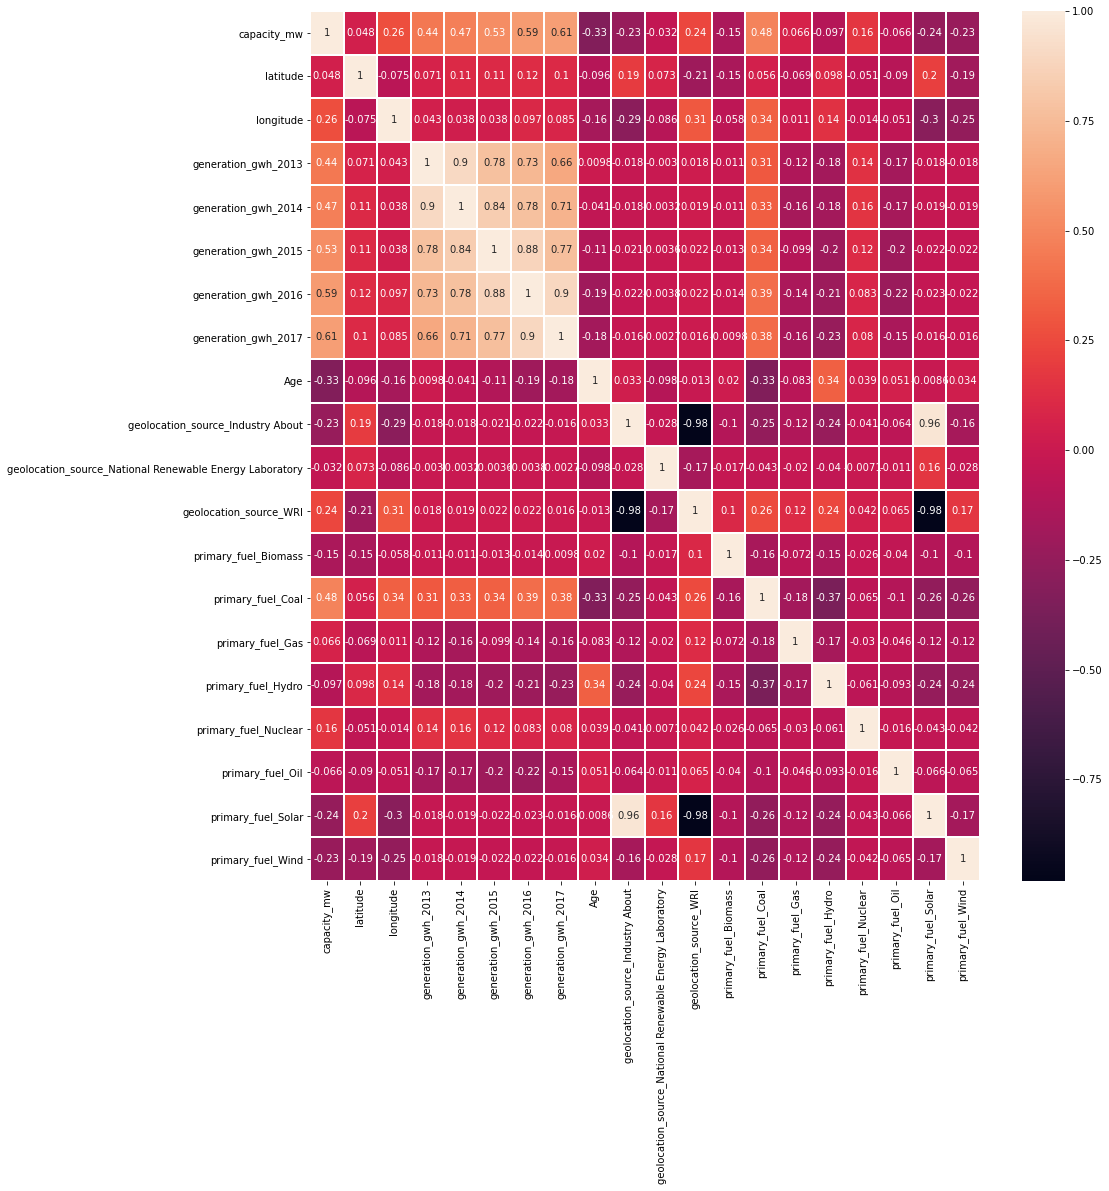

In [197]:
plt.figure(figsize=(15,16))
sns.heatmap(p_corr,annot=True,linewidth=1)
plt.show()

# Visualising correlation of feature columns with label column.

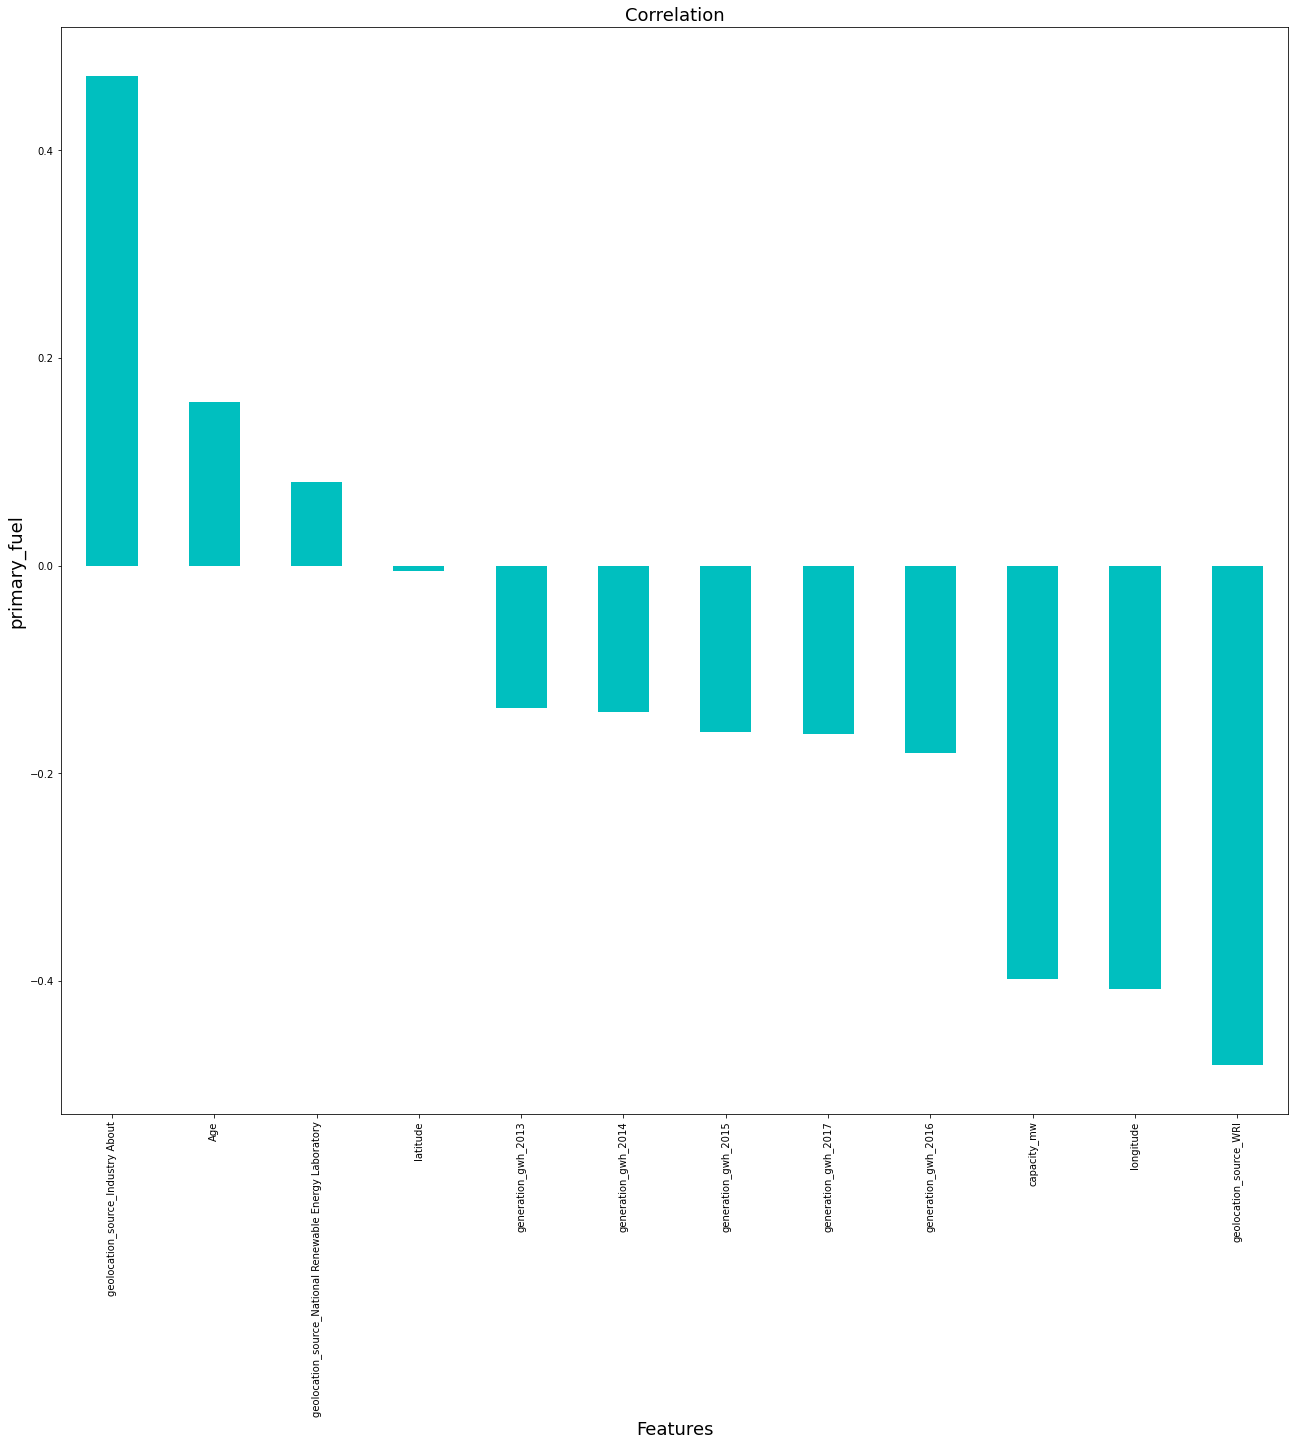

In [198]:
plt.figure(figsize=(22,20))
GPPD_DF.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind = 'bar',color='c')
plt.xlabel('Features',fontsize=18)
plt.ylabel('primary_fuel',fontsize=18)
plt.title('Correlation',fontsize=18)
plt.show()

geolocation_source_industry about has the highest positive correlation followed by Age,Geolocation_source_WRI,longtitude and capacity_mw have the highest negative with primary_fuel

In [199]:
x = GPPD_DF.drop(columns = ['primary_fuel'])
y = GPPD_DF['primary_fuel']

# Feature Selection

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Checking for multicollinearity using variance inflation factor

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [203]:
vif = pd.DataFrame()

In [204]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [205]:
vif.head(10)

,Features,vif
0,capacity_mw,1.996572
1,latitude,1.077803
2,longitude,1.187586
3,generation_gwh_2013,5.480753
4,generation_gwh_2014,7.243784
5,generation_gwh_2015,6.197324
6,generation_gwh_2016,9.687713
7,generation_gwh_2017,5.530811
8,Age,1.233404
9,geolocation_source_Industry About,inf


multicollinearity exists among generation_gwh_2014,generation_gwh_2016,generation_gwh_2015.

# Principle Components Analysis

In [206]:
from sklearn.decomposition import PCA

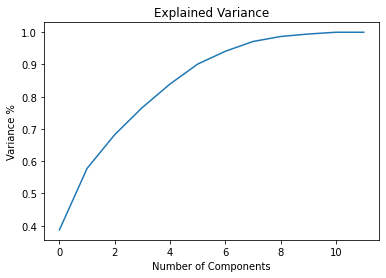

In [207]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

10 components explain around 95% variance in Data

# Selecting KBest feature

In [208]:
from sklearn.feature_selection import SelectKBest, f_classif

In [209]:
bestfeat = SelectKBest(score_func = f_classif, k=12)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [210]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(64,'Score'))

                                              Feature        Score
11                             geolocation_source_WRI  3133.583501
9                   geolocation_source_Industry About  1515.421529
0                                         capacity_mw    57.345805
2                                           longitude    36.211199
6                                 generation_gwh_2016    33.472687
7                                 generation_gwh_2017    30.068362
4                                 generation_gwh_2014    26.445974
8                                                 Age    25.857489
5                                 generation_gwh_2015    25.747680
3                                 generation_gwh_2013    22.163554
1                                            latitude    15.262667
10  geolocation_source_National Renewable Energy L...     3.368539


Dropping highly collinear column 'generation_gwh_2016' and column with lowest score

In [211]:
x_best = x.drop(columns=['generation_gwh_2016','geolocation_source_National Renewable Energy Laboratory']).copy()

In [212]:
scaled_x_best = scaler.fit_transform(x_best)

# Classification Model Building

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [214]:
from imblearn.over_sampling import SMOTE as sm

In [215]:
smt_x,smt_y = sm().fit_resample(scaled_x_best,y.ravel()) #since class imbalance exists

# Finding best Random State

In [216]:
from sklearn.ensemble import RandomForestClassifier

maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .31,random_state = i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print(f"Best accuracy is: {maxAcc} on Random State: {maxRS}")

    
    

Best accuracy is: 0.9278523489932886 on Random State: 2


In [217]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size=.31,random_state=2)

In [218]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [219]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [220]:
RFC = RandomForestClassifier()
XGBC = XGBClassifier()
adbc = AdaBoostClassifier()
LOGR = LogisticRegression(solver='liblinear')
SV = SVC(probability = True)
KNN = KNeighborsClassifier()

# Training the Model

In [221]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
adbc.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

[20:22:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

All models have been trained

# Logistic Regression Model Accuracy

In [222]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [224]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[56,  0,  0,  0,  0,  0,  0,  1],
       [17, 32,  7,  6, 14,  0,  0,  3],
       [ 1, 12, 28,  9,  4,  7,  0, 13],
       [14,  9,  4, 33,  2, 15,  0,  4],
       [ 0,  2,  0,  7, 70,  0,  0,  0],
       [ 7,  0,  0,  1,  0, 46,  0, 28],
       [ 1,  1,  0,  0,  0,  0, 65,  0],
       [44,  0,  0,  1,  0,  0,  0, 32]], dtype=int64)

In [225]:
print(accu)

              precision    recall  f1-score   support

           0       0.40      0.98      0.57        57
           1       0.57      0.41      0.47        79
           2       0.72      0.38      0.50        74
           3       0.58      0.41      0.48        81
           4       0.78      0.89      0.83        79
           5       0.68      0.56      0.61        82
           6       1.00      0.97      0.98        67
           7       0.40      0.42      0.41        77

    accuracy                           0.61       596
   macro avg       0.64      0.63      0.61       596
weighted avg       0.64      0.61      0.60       596



# Random Forest Classifier Model

In [226]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [227]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[55,  0,  0,  0,  0,  0,  0,  2],
       [ 4, 52,  6,  3,  7,  2,  0,  5],
       [ 0,  4, 66,  0,  0,  4,  0,  0],
       [ 0,  4,  0, 76,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 82,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 67,  0],
       [ 1,  0,  0,  0,  0,  1,  0, 75]], dtype=int64)

In [228]:
print(accu)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.87      0.66      0.75        79
           2       0.92      0.89      0.90        74
           3       0.96      0.94      0.95        81
           4       0.92      1.00      0.96        79
           5       0.92      1.00      0.96        82
           6       1.00      1.00      1.00        67
           7       0.90      0.97      0.94        77

    accuracy                           0.93       596
   macro avg       0.93      0.93      0.92       596
weighted avg       0.92      0.93      0.92       596



# XGB Classifier Model Accuracy

In [229]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [230]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[53,  1,  0,  0,  0,  0,  0,  3],
       [ 4, 52,  5,  6,  6,  2,  0,  4],
       [ 0,  6, 61,  1,  1,  5,  0,  0],
       [ 0,  3,  2, 72,  0,  3,  0,  1],
       [ 0,  0,  0,  0, 79,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 81,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 66,  0],
       [ 5,  0,  0,  0,  0,  0,  0, 72]], dtype=int64)

In [231]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        57
           1       0.83      0.66      0.73        79
           2       0.90      0.82      0.86        74
           3       0.90      0.89      0.89        81
           4       0.92      1.00      0.96        79
           5       0.89      0.99      0.94        82
           6       1.00      0.99      0.99        67
           7       0.90      0.94      0.92        77

    accuracy                           0.90       596
   macro avg       0.90      0.90      0.90       596
weighted avg       0.90      0.90      0.90       596



# AdaBoost Classifier Model Accuracy

In [233]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [234]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[57,  0,  0,  0,  0,  0,  0,  0],
       [62, 17,  0,  0,  0,  0,  0,  0],
       [70,  4,  0,  0,  0,  0,  0,  0],
       [76,  5,  0,  0,  0,  0,  0,  0],
       [77,  2,  0,  0,  0,  0,  0,  0],
       [82,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 65,  0],
       [77,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [235]:
print(accu)

              precision    recall  f1-score   support

           0       0.11      1.00      0.20        57
           1       0.59      0.22      0.31        79
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        79
           5       0.00      0.00      0.00        82
           6       1.00      0.97      0.98        67
           7       0.00      0.00      0.00        77

    accuracy                           0.23       596
   macro avg       0.21      0.27      0.19       596
weighted avg       0.20      0.23      0.17       596



# SV Classifier Model Accuracy

In [236]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[51,  0,  0,  0,  0,  0,  0,  6],
       [12, 51,  5,  3,  6,  2,  0,  0],
       [ 1,  8, 45,  1,  2, 17,  0,  0],
       [11,  4,  3, 53,  0,  7,  0,  3],
       [ 0,  0,  0,  0, 79,  0,  0,  0],
       [ 8,  0,  0,  0,  0, 74,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 65,  0],
       [31,  0,  0,  0,  0,  5,  0, 41]], dtype=int64)

In [237]:
print(accu)

              precision    recall  f1-score   support

           0       0.45      0.89      0.60        57
           1       0.78      0.65      0.71        79
           2       0.85      0.61      0.71        74
           3       0.93      0.65      0.77        81
           4       0.91      1.00      0.95        79
           5       0.70      0.90      0.79        82
           6       1.00      0.97      0.98        67
           7       0.82      0.53      0.65        77

    accuracy                           0.77       596
   macro avg       0.81      0.78      0.77       596
weighted avg       0.81      0.77      0.77       596



# KNN Classifier Model Accuracy

In [238]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)

In [239]:
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[55,  0,  0,  0,  0,  0,  0,  2],
       [ 5, 46,  6,  5, 12,  2,  0,  3],
       [ 0,  5, 58,  0,  1, 10,  0,  0],
       [ 3,  5,  7, 60,  0,  3,  0,  3],
       [ 0,  0,  1,  0, 78,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 80,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 67,  0],
       [ 7,  0,  0,  0,  0,  0,  0, 70]], dtype=int64)

In [240]:
print(accu)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        57
           1       0.82      0.58      0.68        79
           2       0.81      0.78      0.79        74
           3       0.92      0.74      0.82        81
           4       0.86      0.99      0.92        79
           5       0.84      0.98      0.90        82
           6       1.00      1.00      1.00        67
           7       0.89      0.91      0.90        77

    accuracy                           0.86       596
   macro avg       0.86      0.87      0.86       596
weighted avg       0.86      0.86      0.86       596



# Model Cross Validation

In [241]:
from sklearn.model_selection import cross_val_score as cvs

# Logistic Regression

In [243]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean())

0.5786458333333333


# Random Forest Classifier

In [244]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.9078125


# XGB Classifier 

In [245]:
print(cvs(XGBC,smt_x,smt_y,cv=5).mean())

[20:42:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

# AdaBoost Classifier

In [246]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.2791666666666666


# SV Classifier

In [247]:
print(cvs(SV,smt_x,smt_y,cv=5).mean())

0.7614583333333333


# KNN Classifier

In [248]:
print(cvs(KNN,smt_x,smt_y,cv=5).mean())

0.8588541666666666


# Based on comparing accuracy score results, with cross validation results. It is determined that RandomForest Classifier is the best model.

# ROC AUC Scores

In [249]:
import scikitplot as sktplt

# Logistic Regression

In [250]:
lr_prob = LOGR.predict_proba(x_test)

In [251]:
import numpy as np
from sklearn.metrics import roc_auc_score

In [252]:
roc_auc_score(y_test,lr_prob,multi_class = 'ovo',average='weighted')

0.9069169326389371

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

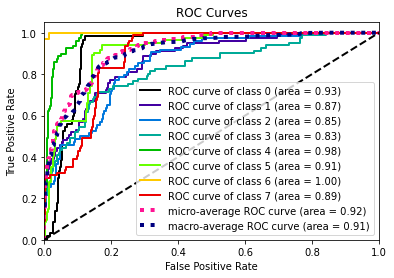

In [253]:
sktplt.metrics.plot_roc(y_test,lr_prob)

# SV Classifier

In [254]:
SV = SVC(probability = True)
SV = SVC(probability = True).fit(x_train,y_train.ravel())

In [255]:
SVpred = SV.predict(x_test)

In [256]:
sv_prb = SV.predict_proba(x_test)

In [257]:
roc_auc_score(y_test,sv_prb,multi_class = 'ovo',average='weighted')

0.9608614188272836

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

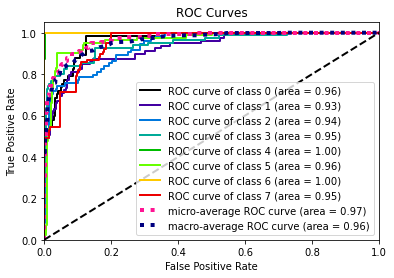

In [258]:
sktplt.metrics.plot_roc(y_test,sv_prb)

# AdaBoost Classifier

In [259]:
adbc_prob = adbc.predict_proba(x_test)
roc_auc_score(y_test,adbc_prob,multi_class = 'ovo',average = 'weighted')

0.6360727722817008

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

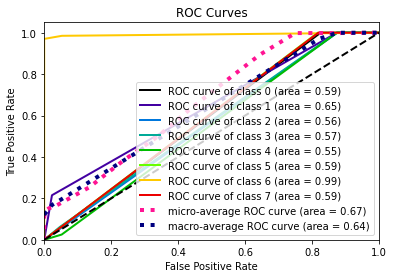

In [260]:
sktplt.metrics.plot_roc(y_test,adbc_prob)

# XGB Classifier

In [261]:
XGBC_prob = XGBC.predict_proba(x_test)
roc_auc_score(y_test,XGBC_prob,multi_class = 'ovo',average = 'weighted')

0.9908301331970827

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

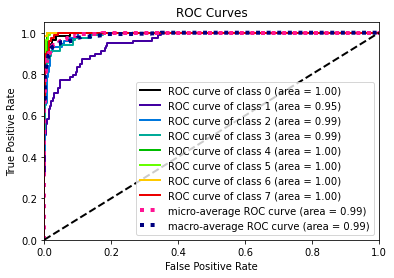

In [262]:
sktplt.metrics.plot_roc(y_test,XGBC_prob)

# Random Forest Classifier

In [264]:
RFC_prob = RFC.predict_proba(x_test)
roc_auc_score(y_test,RFC_prob,multi_class = 'ovo',average = 'weighted')

0.991864027983351

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

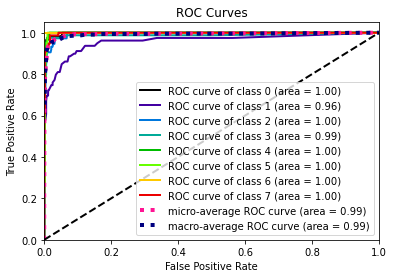

In [265]:
sktplt.metrics.plot_roc(y_test,RFC_prob)

# KNN Classifier

In [266]:
KNN_prob = KNN.predict_proba(x_test)
roc_auc_score(y_test,KNN_prob,multi_class='ovo',average='weighted')

0.9726437183294964

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

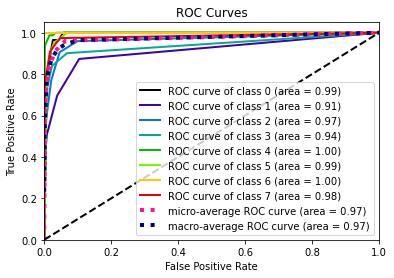

In [267]:
sktplt.metrics.plot_roc(y_test,KNN_prob)

Based on the above graph and roc_auc_scores, Random Forest Classifier is the best model for the dataset and roc_auc_score = 0.99

# Hyper Parameter Tuning

Random Forest Classifier

In [268]:
parameter = {'n_estimators':[30,50,60],'max_depth':[10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [269]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1, verbose = 1)

In [279]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]},
             verbose=1)

In [280]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [281]:
Best_mod = RandomForestClassifier(n_estimators = 50,criterion='entropy',max_depth=10,max_features='log2',min_samples_leaf=5,min_samples_split=5)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

85.23489932885906


# RandomForest Classifier has an accuracy of 85.23%

# XGB Classifier

In [282]:
parameter = {'booster':["gbtree","gblinear"],'eta':[0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [283]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs = -1,verbose=1)

In [284]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[22:36:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [285]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.3,
 'max_depth': 20,
 'min_child_weight': 0,
 'subsample': 0.5}

In [286]:
Best_mod = XGBClassifier(booster = 'gbtree',eta=0.3,max_depth=20,min_child_weight = 0,subsample=0.5)

In [287]:
Best_mod.fit(x_train,y_train)

[23:34:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [288]:
xgpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,xgpred)
print(acc*100)

91.2751677852349


In [289]:
conf_matrx = confusion_matrix(y_test,xgpred)
conf_matrx

array([[54,  0,  0,  0,  0,  0,  0,  3],
       [ 5, 53,  5,  4,  7,  2,  0,  3],
       [ 0,  8, 62,  1,  0,  3,  0,  0],
       [ 1,  4,  0, 73,  0,  3,  0,  0],
       [ 0,  1,  0,  0, 78,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 82,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 66,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 76]], dtype=int64)

XGB Classifier has accuracy of 91.27%

# On comparing the accuracies of the 2 models it is determined that XGB Classifier is the better model.

Saving the model

In [290]:
import joblib
joblib.dump(Best_mod,"BestModelFuelType.pkl")

['BestModelFuelType.pkl']

# Loading the Model

In [291]:
mod = joblib.load("BestModelFuelType.pkl")

In [292]:
print(mod.predict(x_test))

[1 7 4 1 3 5 3 2 7 2 6 3 3 4 1 5 4 4 5 7 7 2 2 1 6 2 3 4 7 3 3 7 1 5 5 3 4
 7 4 7 1 6 6 5 5 5 6 3 4 3 5 3 0 5 4 5 0 1 4 6 0 1 7 1 4 1 5 6 2 3 7 5 7 1
 4 0 3 1 1 6 1 2 3 7 5 3 3 0 2 0 4 2 0 6 2 0 5 1 5 6 2 5 3 5 2 0 7 1 0 4 5
 3 4 6 4 1 3 2 2 4 2 5 5 6 4 1 2 1 5 7 3 3 5 7 5 5 6 0 4 7 6 7 2 6 7 7 1 1
 6 7 4 4 1 2 5 2 3 1 2 3 3 3 3 4 0 5 7 6 6 6 3 4 5 1 4 1 4 2 6 6 2 3 0 1 5
 2 1 7 4 4 2 6 3 1 7 7 3 4 2 0 7 6 0 0 7 2 5 7 7 4 2 4 3 7 4 5 6 4 2 4 1 6
 3 1 0 2 4 7 2 2 3 1 1 5 5 0 0 0 7 4 3 1 0 1 2 3 3 5 0 2 5 2 6 0 5 2 1 0 1
 5 7 3 4 7 7 5 4 4 2 7 6 4 3 3 1 7 5 7 6 6 5 3 5 1 4 2 0 6 2 2 3 3 4 2 1 3
 0 2 0 5 4 1 5 7 3 3 5 3 4 7 4 0 5 5 5 7 5 5 4 1 7 6 3 6 3 7 6 4 5 4 1 3 4
 2 4 1 4 3 4 7 3 1 6 4 0 7 5 4 3 5 2 3 3 2 5 2 4 7 0 5 7 0 7 4 3 1 1 0 6 3
 5 2 1 6 4 7 3 6 5 4 2 1 1 0 6 3 2 2 1 5 4 1 4 5 5 3 5 6 7 4 4 6 4 6 1 1 5
 0 5 5 2 6 0 0 5 0 4 4 6 5 0 4 5 6 0 5 6 4 4 6 7 4 0 7 0 5 4 3 4 0 7 7 6 7
 5 6 6 0 7 5 0 6 7 2 0 3 1 0 2 4 1 3 3 4 7 1 7 2 1 6 4 5 0 6 4 7 5 7 1 7 0
 5 5 0 6 7 0 1 7 5 7 1 6 

In [293]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
0,1,1
1,7,7
2,4,4
3,1,1
4,3,3
5,5,5
6,3,2
7,2,2
8,7,0
9,2,2
